In [52]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
%matplotlib inline

writing = pd.read_csv('letter-recognition.data')

writing

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [53]:
writing.iloc[:,1:].describe() #show the independent variable

,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
count,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.00000
mean,4.023651,7.035452,5.121956,5.372469,3.505975,6.897545,7.500175,4.628831,5.178609,8.282164,6.453823,7.928996,3.046252,8.338867,3.691935,7.80119
std,1.913206,3.304631,2.014568,2.261445,2.190441,2.026071,2.325087,2.699837,2.380875,2.488485,2.631016,2.080671,2.332500,1.546759,2.567004,1.61751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000


In [54]:
writing.columns
writing.drop(['T'],axis=1)

,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [55]:
x = writing.drop(['T'],axis=1)
y = writing['T'].values 


In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

pca = PCA(n_components=4)
pca.fit(x_train,y_train)
principalcomponent = pca.fit_transform(x_test)



pca_columns = ['pca_comp1', 'pca_comp2','pca_comp3','pca_comp4']
pca_df = pd.DataFrame(data=principalcomponent, columns=pca_columns)


pca_df

,pca_comp1,pca_comp2,pca_comp3,pca_comp4
0,0.333806,-2.889734,1.899799,2.349113
1,7.191037,-2.364515,-5.783741,1.644397
2,-7.651264,-3.525684,-4.432228,-4.483800
3,-8.776146,4.971901,0.083842,-0.164172
4,-5.858257,5.377486,3.375388,-2.244747
...,...,...,...,...
3995,2.184720,-4.501504,0.276557,-3.430170
3996,5.551609,0.228902,-5.615894,-2.836795
3997,-1.095087,-6.346601,-0.264606,-3.643695
3998,12.232011,-1.536674,-0.924521,-2.574555


In [57]:
pca.explained_variance_ratio_

array([0.28447504, 0.15037089, 0.125478  , 0.08616569])

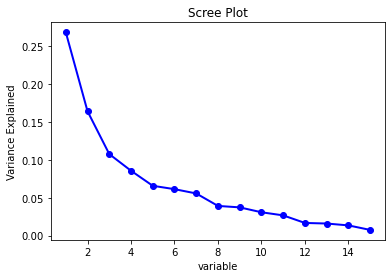

[0.26846009 0.16409742 0.10757239 0.08557186 0.06571382 0.06125425
 0.05558286 0.039111   0.03721695 0.03074366 0.0266375  0.01663726
 0.01587223 0.01340897 0.00743974]


In [58]:
pca = PCA(n_components=15)
pca_fit = pca.fit(scaled_df)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('variable')
plt.ylabel('Variance Explained')
plt.show()
print(pca.explained_variance_ratio_)

In [59]:
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)
pca = PCA(n_components=4)

In [60]:
pca.fit(x_train,y_train)
principalcomponent = pca.fit_transform(x_test)



pca_columns = ['pca_comp1', 'pca_comp2','pca_comp3','pca_comp4']
pca_df = pd.DataFrame(data=principalcomponent, columns=pca_columns)
pca_df

,pca_comp1,pca_comp2,pca_comp3,pca_comp4
0,-0.154730,1.766964,0.655983,1.221594
1,2.878540,1.175142,-2.526464,1.003527
2,-3.238607,1.509913,-1.406403,-2.168169
3,-3.218702,-2.328898,0.424161,-0.107300
4,-1.918100,-1.861823,1.731560,-0.645625
...,...,...,...,...
3995,0.278694,1.519427,0.302942,-0.884491
3996,2.416131,0.267335,-2.068206,-1.481996
3997,-0.705275,2.773810,0.123809,-1.341930
3998,4.971752,1.054576,-0.481850,-1.188920


In [61]:
pca.explained_variance_ratio_

array([0.26719011, 0.16076209, 0.10838111, 0.08340957])